In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [20]:
!wget http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip


--2022-09-21 14:43:54--  http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip
Resolving labrosa.ee.columbia.edu (labrosa.ee.columbia.edu)... 128.59.66.11
Connecting to labrosa.ee.columbia.edu (labrosa.ee.columbia.edu)|128.59.66.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://millionsongdataset.com/sites/default/files/challenge/train_triplets.txt.zip [following]
--2022-09-21 14:43:54--  http://millionsongdataset.com/sites/default/files/challenge/train_triplets.txt.zip
Resolving millionsongdataset.com (millionsongdataset.com)... 172.104.14.177
Connecting to millionsongdataset.com (millionsongdataset.com)|172.104.14.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512137572 (488M) [application/zip]
Saving to: ‘train_triplets.txt.zip’

train_triplets.txt. 100%[===================>] 488.41M   262MB/s    in 1.9s    

2022-09-21 14:43:56 (262 MB/s) - ‘train_triplets.txt.z

In [21]:
listen_count = pd.read_csv('train_triplets.txt.zip', header=None, delimiter='\t')
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [22]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

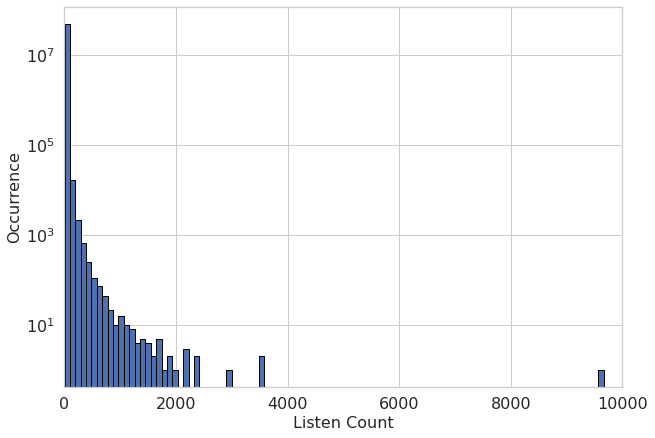

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log')#, nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [24]:
# write your code here
!wget https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download


--2022-09-21 14:44:46--  https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Farjunprasadsarkhel%2F2021-olympics-in-tokyo%3Fresource%3Ddownload [following]
--2022-09-21 14:44:47--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Farjunprasadsarkhel%2F2021-olympics-in-tokyo%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download’

download                [ <=>                ]   6.48K  --.-KB/s    in 0s      

2022-09-21 14:44:47 (15.6 MB/s) 

In [27]:
df=pd.read_excel('/content/Athletes.xlsx')

In [28]:
df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [29]:
df['NOC']

0         Norway
1          Spain
2          Italy
3          Spain
4          Spain
          ...   
11080    Germany
11081     Poland
11082        ROC
11083        ROC
11084     Poland
Name: NOC, Length: 11085, dtype: object

## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [30]:
# write you code here
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
label_encoder=LabelEncoder()
df['encoded_noc']=label_encoder.fit_transform(df['NOC'])

In [31]:
df['NOC'],df['encoded_noc']

(0         Norway
 1          Spain
 2          Italy
 3          Spain
 4          Spain
           ...   
 11080    Germany
 11081     Poland
 11082        ROC
 11083        ROC
 11084     Poland
 Name: NOC, Length: 11085, dtype: object, 0        136
 1        174
 2         92
 3        174
 4        174
         ... 
 11080     71
 11081    147
 11082    151
 11083    151
 11084    147
 Name: encoded_noc, Length: 11085, dtype: int64)

In [32]:
df.head()

,Name,NOC,Discipline,encoded_noc
0,AALERUD Katrine,Norway,Cycling Road,136
1,ABAD Nestor,Spain,Artistic Gymnastics,174
2,ABAGNALE Giovanni,Italy,Rowing,92
3,ABALDE Alberto,Spain,Basketball,174
4,ABALDE Tamara,Spain,Basketball,174


In [33]:
country_wise=df[['encoded_noc']].groupby(df['encoded_noc']).count()
country_wise.head()

,encoded_noc
encoded_noc,
0,5
1,8
2,41
3,5
4,2


In [34]:
df.head()

,Name,NOC,Discipline,encoded_noc
0,AALERUD Katrine,Norway,Cycling Road,136
1,ABAD Nestor,Spain,Artistic Gymnastics,174
2,ABAGNALE Giovanni,Italy,Rowing,92
3,ABALDE Alberto,Spain,Basketball,174
4,ABALDE Tamara,Spain,Basketball,174


# Binarization and visualization

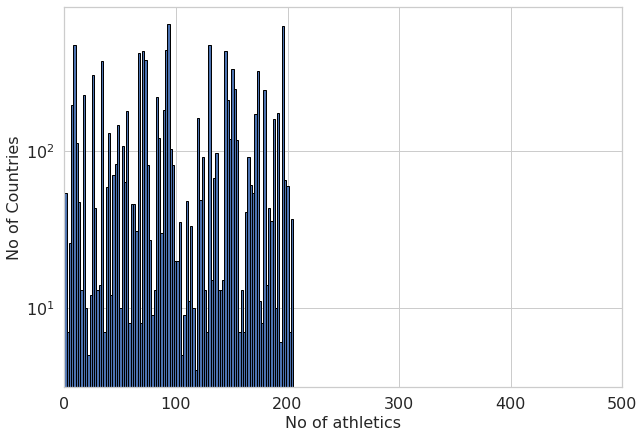

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(df['encoded_noc'], bins = 100, edgecolor='black')
plt.yscale('log')#, nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,500])
_ = plt.xlabel('No of athletics', fontsize=16)
_ = plt.ylabel('No of Countries', fontsize=16)

## **(Tutorial) Quantizing data**

In [37]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([37, 34, 40,  8, 48,  5,  2, 86, 51, 62, 60, 30, 59, 97, 56, 43, 27,
       80, 70, 79])

In [38]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([3, 3, 4, 0, 4, 0, 0, 8, 5, 6, 6, 3, 5, 9, 5, 4, 2, 8, 7, 7])

In [39]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [40]:
import json

In [41]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [42]:
!wget https://raw.githubusercontent.com/melqkiades/yelp/master/notebooks/yelp_academic_dataset_business.json

--2022-09-21 14:46:06--  https://raw.githubusercontent.com/melqkiades/yelp/master/notebooks/yelp_academic_dataset_business.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12970329 (12M) [text/plain]
Saving to: ‘yelp_academic_dataset_business.json’

yelp_academic_datas 100%[===================>]  12.37M  --.-KB/s    in 0.05s   

2022-09-21 14:46:07 (248 MB/s) - ‘yelp_academic_dataset_business.json’ saved [12970329/12970329]



In [43]:
biz_df = load_json_df('/content/yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [44]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [45]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

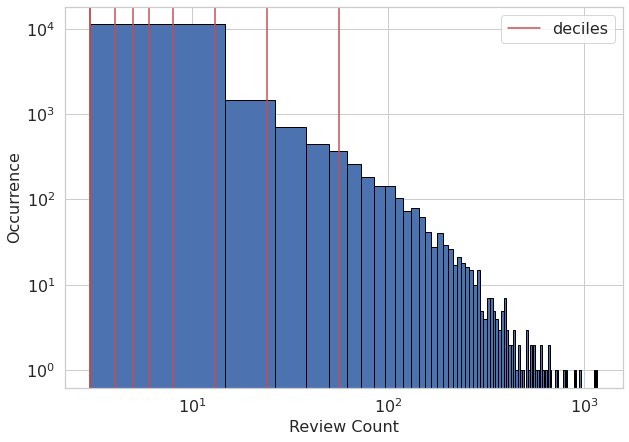

In [46]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Number of Countries')

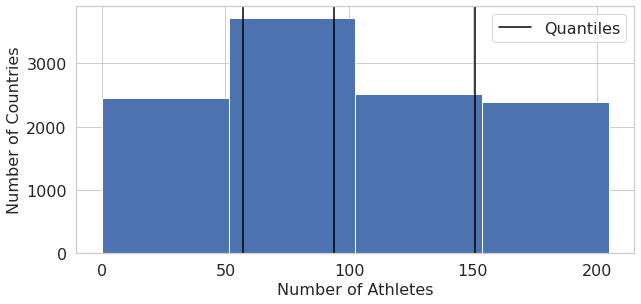

In [47]:
# write the code here
pd.qcut(df['encoded_noc'], 4, labels=False)
atheletics_coun= pd.Series(df['encoded_noc']) 
atheletics_coun_quan=atheletics_coun.quantile([0.25, 0.5, 0.75])
df['log_tran_atheletics_country']=np.log10(df['encoded_noc'])
plt.figure(figsize=(10, 10))
ax = plt.subplot(2,1,1)

df['encoded_noc'].hist(ax=ax, bins=4)
for quan in atheletics_coun_quan:
    quan_plot = plt.axvline(quan, color='black')
ax.legend([quan_plot], ['Quantiles'], fontsize=16) 
ax.tick_params(labelsize=16)
ax.set_xlabel('Number of Athletes', fontsize=16)
ax.set_ylabel('Number of Countries', fontsize=16)




In [48]:
df['encoded_noc']

0        136
1        174
2         92
3        174
4        174
        ... 
11080     71
11081    147
11082    151
11083    151
11084    147
Name: encoded_noc, Length: 11085, dtype: int64

In [49]:
df['log_tran_atheletics_coun'] = df['log_tran_atheletics_country'].replace(df['log_tran_atheletics_country'][448], 0)

In [50]:
df['log_tran_atheletics_coun'][0:449]

0      2.133539
1      2.240549
2      1.963788
3      2.240549
4      2.240549
         ...   
444    1.681241
445    2.079181
446    2.089905
447    2.252853
448    0.000000
Name: log_tran_atheletics_coun, Length: 449, dtype: float64

Text(0, 0.5, 'Number of Countries')

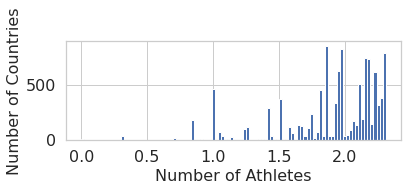

In [51]:
ax = plt.subplot(2,1,2)
df['log_tran_atheletics_coun'].hist(ax=ax, bins=100)

ax.tick_params(labelsize=16)
ax.set_xlabel('Number of Athletes', fontsize=16)
ax.set_ylabel('Number of Countries', fontsize=16)


## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: Type your answer here

The purpose to apply the log transform is
**Easy to use**:it is more practical to use the modified data it looks natural as the original data.it's also  help the algorithm learn better and gives the accurate result and also it's makes the additive and the linear models looks better.its always better to use the logtransform because it's reduces the negative effect of the learning algorithm with the values in the range[small values and the bigvalues]
**Reduce Skewness**
Its reduces the skewness of the data distribution and also this make the data to looks Normal.In the real world purposes we see that data looks right skewed(large values in distribution) and left skewed (smaller values in distribution).so its always good that the data is symmetric distribution and we use the logarithms ,square roots to reduce the right skewness  and we apply the squares,cubes to reduce the left skewness to look the data better.
**Improves Models**
By applying the transformations the model performances increases.so, here we reduce the log loss.
By applying the transformation it helps to find the patterns in data.we can easily find the relationship if it is linear rather the Curves.



---


## **(Tutorial) Box-Cox transform**

In [52]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

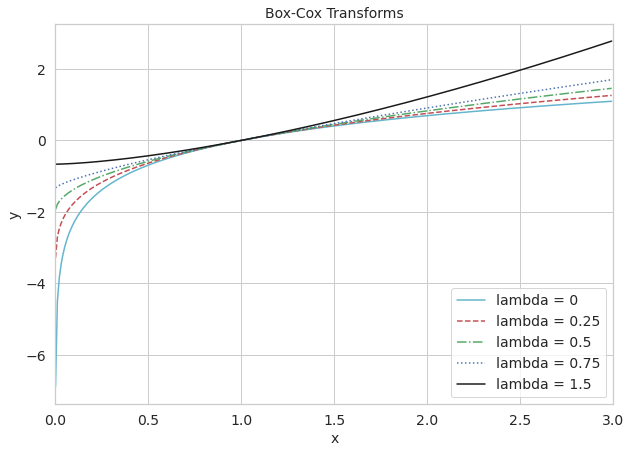

In [53]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [54]:
from scipy import stats

In [55]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

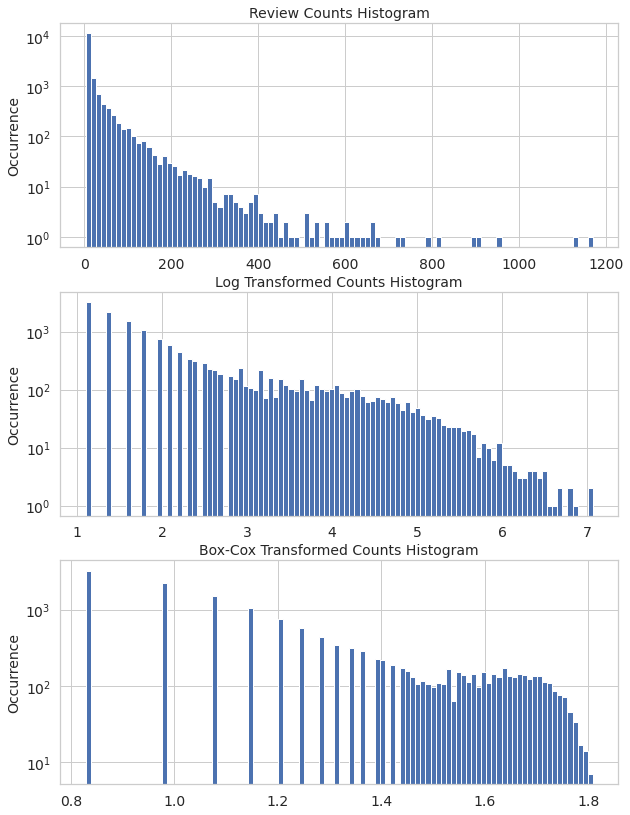

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

In [57]:
from scipy import stats

boxCox, boxCox_params = stats.boxcox(country_wise['encoded_noc'])

boxCox = pd.Series(boxCox)


Text(0, 0.5, 'Occurrence')

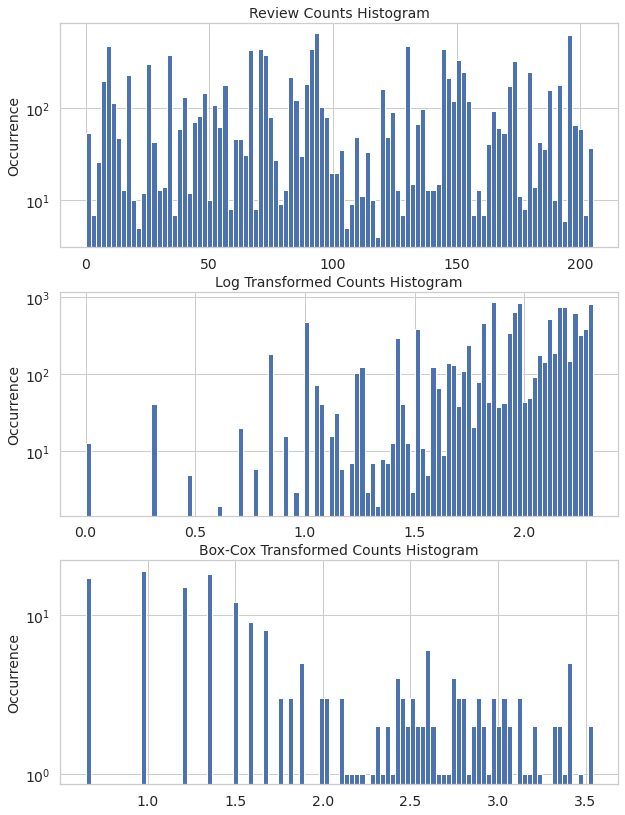

In [58]:
# write your code here
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
df['encoded_noc'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
df['log_tran_atheletics_coun'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
boxCox.hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)


## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

The Different types of Transformation Methods other than log and Box-cox
Reciprocal Transformation
SquareRoot Transformation
Yeo Johnson Transformation
**Reciprocal Transformation**
if x is the input.in the reciprocal we do 1/x.By applying this transformation on the data.They only have less impact on the shape.
This can only use if the data is non-zero values.
rec_output=1/data['output']
**Square Root Transformation**
The main Advantage when compare to Reciprocal we can use this for the zeros values while Reciprocal cannot be used for zero values.And the impact on the data distribution is moderate.
sqt_output=data['output']**1/2
**Yeo Johnson Transformation**
The Yeo Johnson Transformation is just like box Cox transformation and it is one of the oldest Transformation.
there is no need that all the values are strictly Positively.
This Transformation have the ability the ability to make the distribution symmetric.

from scipy.stats import Yeojohnson
yeo_output,lt=yeojohnson(data['output'])

**Answer to Q2:** write your answer here

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2022-09-21 14:32:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  11.4MB/s    in 0.6s    

2022-09-21 14:32:25 (11.4 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [10]:
import sklearn.preprocessing as preproc

In [11]:
import zipfile

In [12]:
data=zipfile.ZipFile("/content/OnlineNewsPopularity.zip",'r')

In [13]:
data.extractall()
data.close()

In [14]:
news_df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [15]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [16]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [17]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 39.49999999999994, 'L2-normalized word count')

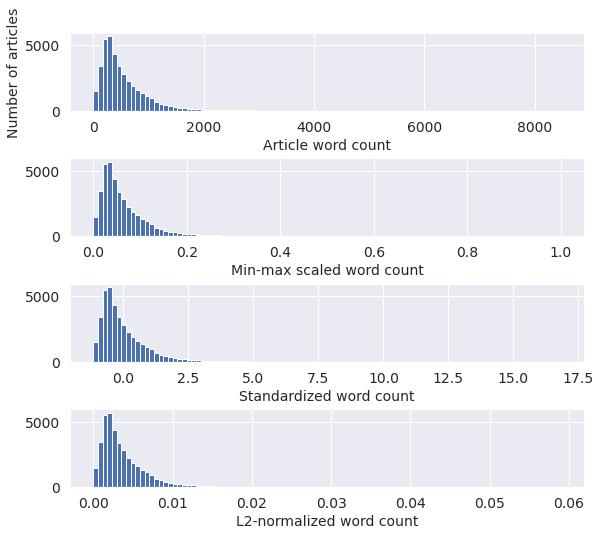

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

#Visualizing the original data

In [68]:
# Scaling
df['minmax']=preproc.minmax_scale(df['encoded_noc'])
df['minmax'].values

array([0.66341463, 0.84878049, 0.44878049, ..., 0.73658537, 0.73658537,
       0.71707317])

In [69]:
# Standardization
df['standardized'] = preproc.StandardScaler().fit_transform(df[['encoded_noc']])
df['standardized'].values

array([ 0.5721718 ,  1.22426235, -0.18288041, ...,  0.82957596,
        0.82957596,  0.76093485])

In [70]:
# L2-normalization
df['l2_normalized'] = preproc.normalize(df[['encoded_noc']], axis=0)
df['l2_normalized'].values

array([0.01094277, 0.01400031, 0.00740246, ..., 0.0121497 , 0.0121497 ,
       0.01182785])

Text(0.5, 0, 'L2-normalized word count')

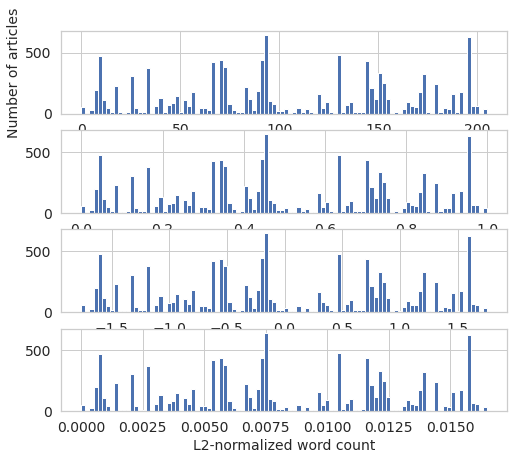

In [71]:
# write your code here
ffig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

df['encoded_noc'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

Visualizing Scaled Data

In [ ]:
df['minmax_log']=preproc.minmax_scale(df['log_tran_atheletics_coun'])
df['minmax_log'].values

In [74]:
# Standardization
df['standardized_log'] = preproc.StandardScaler().fit_transform(df[['log_tran_atheletics_coun']])
df['standardized_log'].values

array([0.62034033, 0.89519183, 0.1843419 , ..., 0.737046  , 0.737046  ,
       0.70709878])

In [78]:
# L2-normalization
df['l2_normalized_log'] = preproc.normalize(df[['log_tran_atheletics_coun']], axis=0)
df['l2_normalized_log'].values

array([0.01049064, 0.01101681, 0.00965597, ..., 0.01071406, 0.01071406,
       0.01065673])

Text(0.5, 0, 'L2-normalized word count')

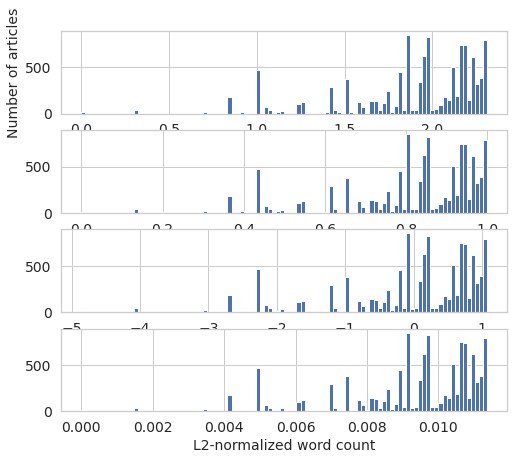

In [79]:
# write your code here
ffig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

df['log_tran_atheletics_coun'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax_log'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized_log'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized_log'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: type your answer here

**Similarities**

in Histograms Data is not Normally distributed after after applying the Min max Standardization,Normalization.

in Histograms Data is not Left Skewed and Right Skewed the data is equally Distribued in the plot

All the Histograms Looked so similar

**Differences**

The Horizontal Axis is Different Because we are using Different Scales

Like Min max,Standarization,Normaliozation

---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** type your answer here



**Difference**
Scaling only changes the Range of the data scale along the axis.
.while the Standardization,normalization the data distribution is changed.
So,when we compared both Scaling only changes the range.while in the Normalization the shape is changed

All the Histograms are Left Skewed

All the Histograms Looked Similar


---


## Example of interaction features in prediction

In [80]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [81]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [82]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [83]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [84]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [85]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [86]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113157983


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [87]:
# write your code here
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

--2022-09-21 17:58:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  8.16MB/s    in 0.6s    

2022-09-21 17:58:46 (8.16 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



In [89]:
z=zipfile.ZipFile('/content/DryBeanDataset.zip','r')
z.extractall()
z.close()

In [90]:
data=pd.read_excel('/content/DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [91]:
data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [94]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Class_num']=label_encoder.fit_transform(data['Class'])


In [95]:
data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_num
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5


In [96]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'Class_num'],
      dtype='object')

In [97]:
features=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [100]:
X=data[features]
y=data['Class_num']

In [101]:
X.shape

(13611, 17)

In [102]:
Data2= preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, Data2, y, test_size=0.3, random_state=123)

In [103]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [104]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 1.00000
R-squared score with pairwise features: 0.9999999999
